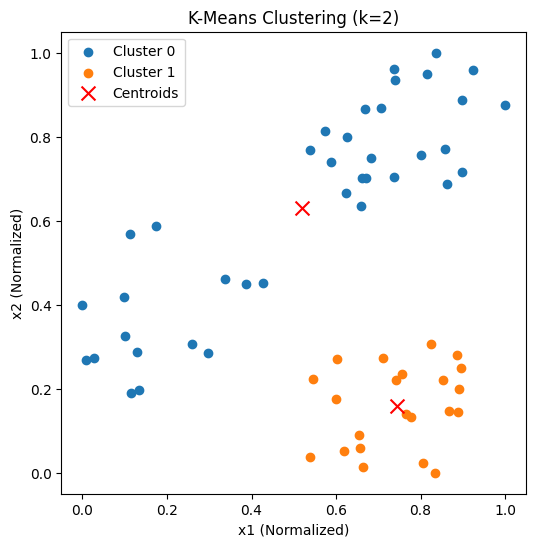

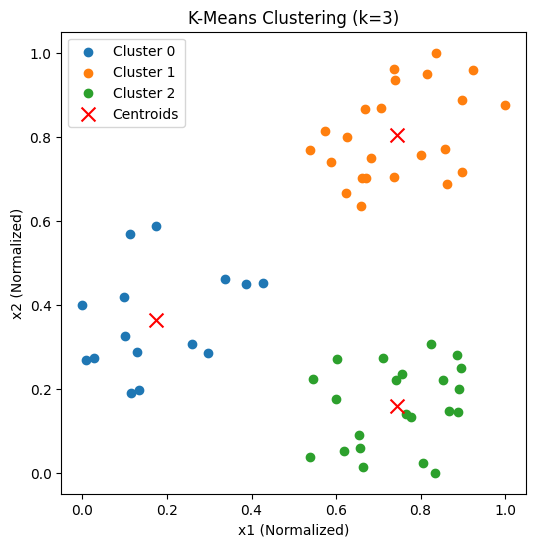

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
csv_path = 'C:/Users/samar/OneDrive/Desktop/stupid things 1/DSA/kmeans - kmeans_blobs - kmeans - kmeans_blobs.csv'
df = pd.read_csv(csv_path)

# Convert dataframe to numpy array
data = df.to_numpy()

# Normalize the dataset using min-max scaling
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Set random seed for reproducibility
np.random.seed(42)

# Run K-Means for k=2 and k=3
for k in [2, 3]:
    # Step 1: Initialize k random cluster centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    max_iters = 100  # Maximum iterations
    tol = 1e-4  # Convergence threshold

    for _ in range(max_iters):
        # Step 2: Compute Euclidean distance from each point to each centroid
        distances = np.zeros((data.shape[0], k))
        for i in range(k):
            distances[:, i] = np.sqrt(np.sum((data - centroids[i]) ** 2, axis=1))
        
        # Step 3: Assign each data point to the nearest centroid
        cluster_labels = np.argmin(distances, axis=1)

        # Step 4: Compute new centroids as the mean of assigned points
        new_centroids = np.zeros((k, data.shape[1]))
        for i in range(k):
            new_centroids[i] = np.mean(data[cluster_labels == i], axis=0)
        
        # Step 5: Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids

    # Step 6: Plot the clusters
    plt.figure(figsize=(6, 6))
    for i in range(k):
        plt.scatter(data[cluster_labels == i, 0], data[cluster_labels == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('x1 (Normalized)')
    plt.ylabel('x2 (Normalized)')
    plt.legend()
    plt.show()
